# 安徽安庆市项目`WRF-CMAQ`模拟分析
## Model Evaluation : `chem-obs data`

---
*@author: Evan*\
*@date: 2023-08-08*

In [1]:
import sys
sys.path.append('../../src/')
import ModelEvaLib as me
from namelist import *

import matplotlib.pyplot as plt

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'O3'
varch = 'O3'

title = '$O_3$'
units = '$\mu$$g/$$m^3$'

## 安庆市全部

In [3]:
df, sim, obs = me.get_var(cmaqfile,var,shpall,obsall,varch)

Get the O3 in shape of (744, 138, 135)
Extract the data within the boundary ...
Finish
Get the O3 in shape of (744,)
data is ready


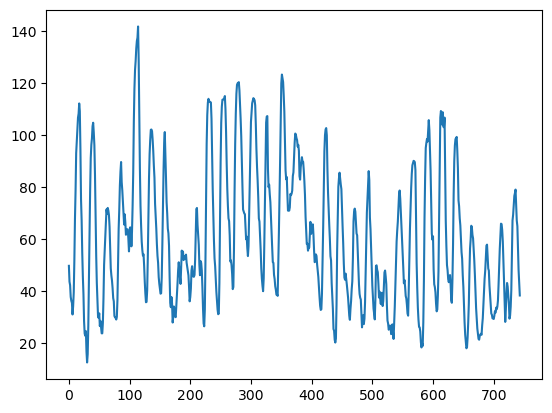

In [24]:
obs.plot()
plt.show()

In [22]:
import pandas as pd
import numpy as np

df_hour = pd.DataFrame(index=pd.date_range(timestart,timeend,freq='H'),
                       data={'sim':sim,'obs':obs.values})
df_hour.loc[df_hour['sim'] == float('inf')] =np.nan
df_day = df_hour.resample('D').max()
df_day

,sim,obs
2023-07-01,129.836792,39.700000
2023-07-02,137.488861,26.944444
2023-07-03,92.355385,27.947368
2023-07-04,123.811523,36.700000
2023-07-05,118.126213,63.100000
2023-07-06,110.045937,36.000000
2023-07-07,93.502792,39.300000
2023-07-08,91.650818,30.111111
2023-07-09,98.969849,37.850000
2023-07-10,125.394417,33.100000


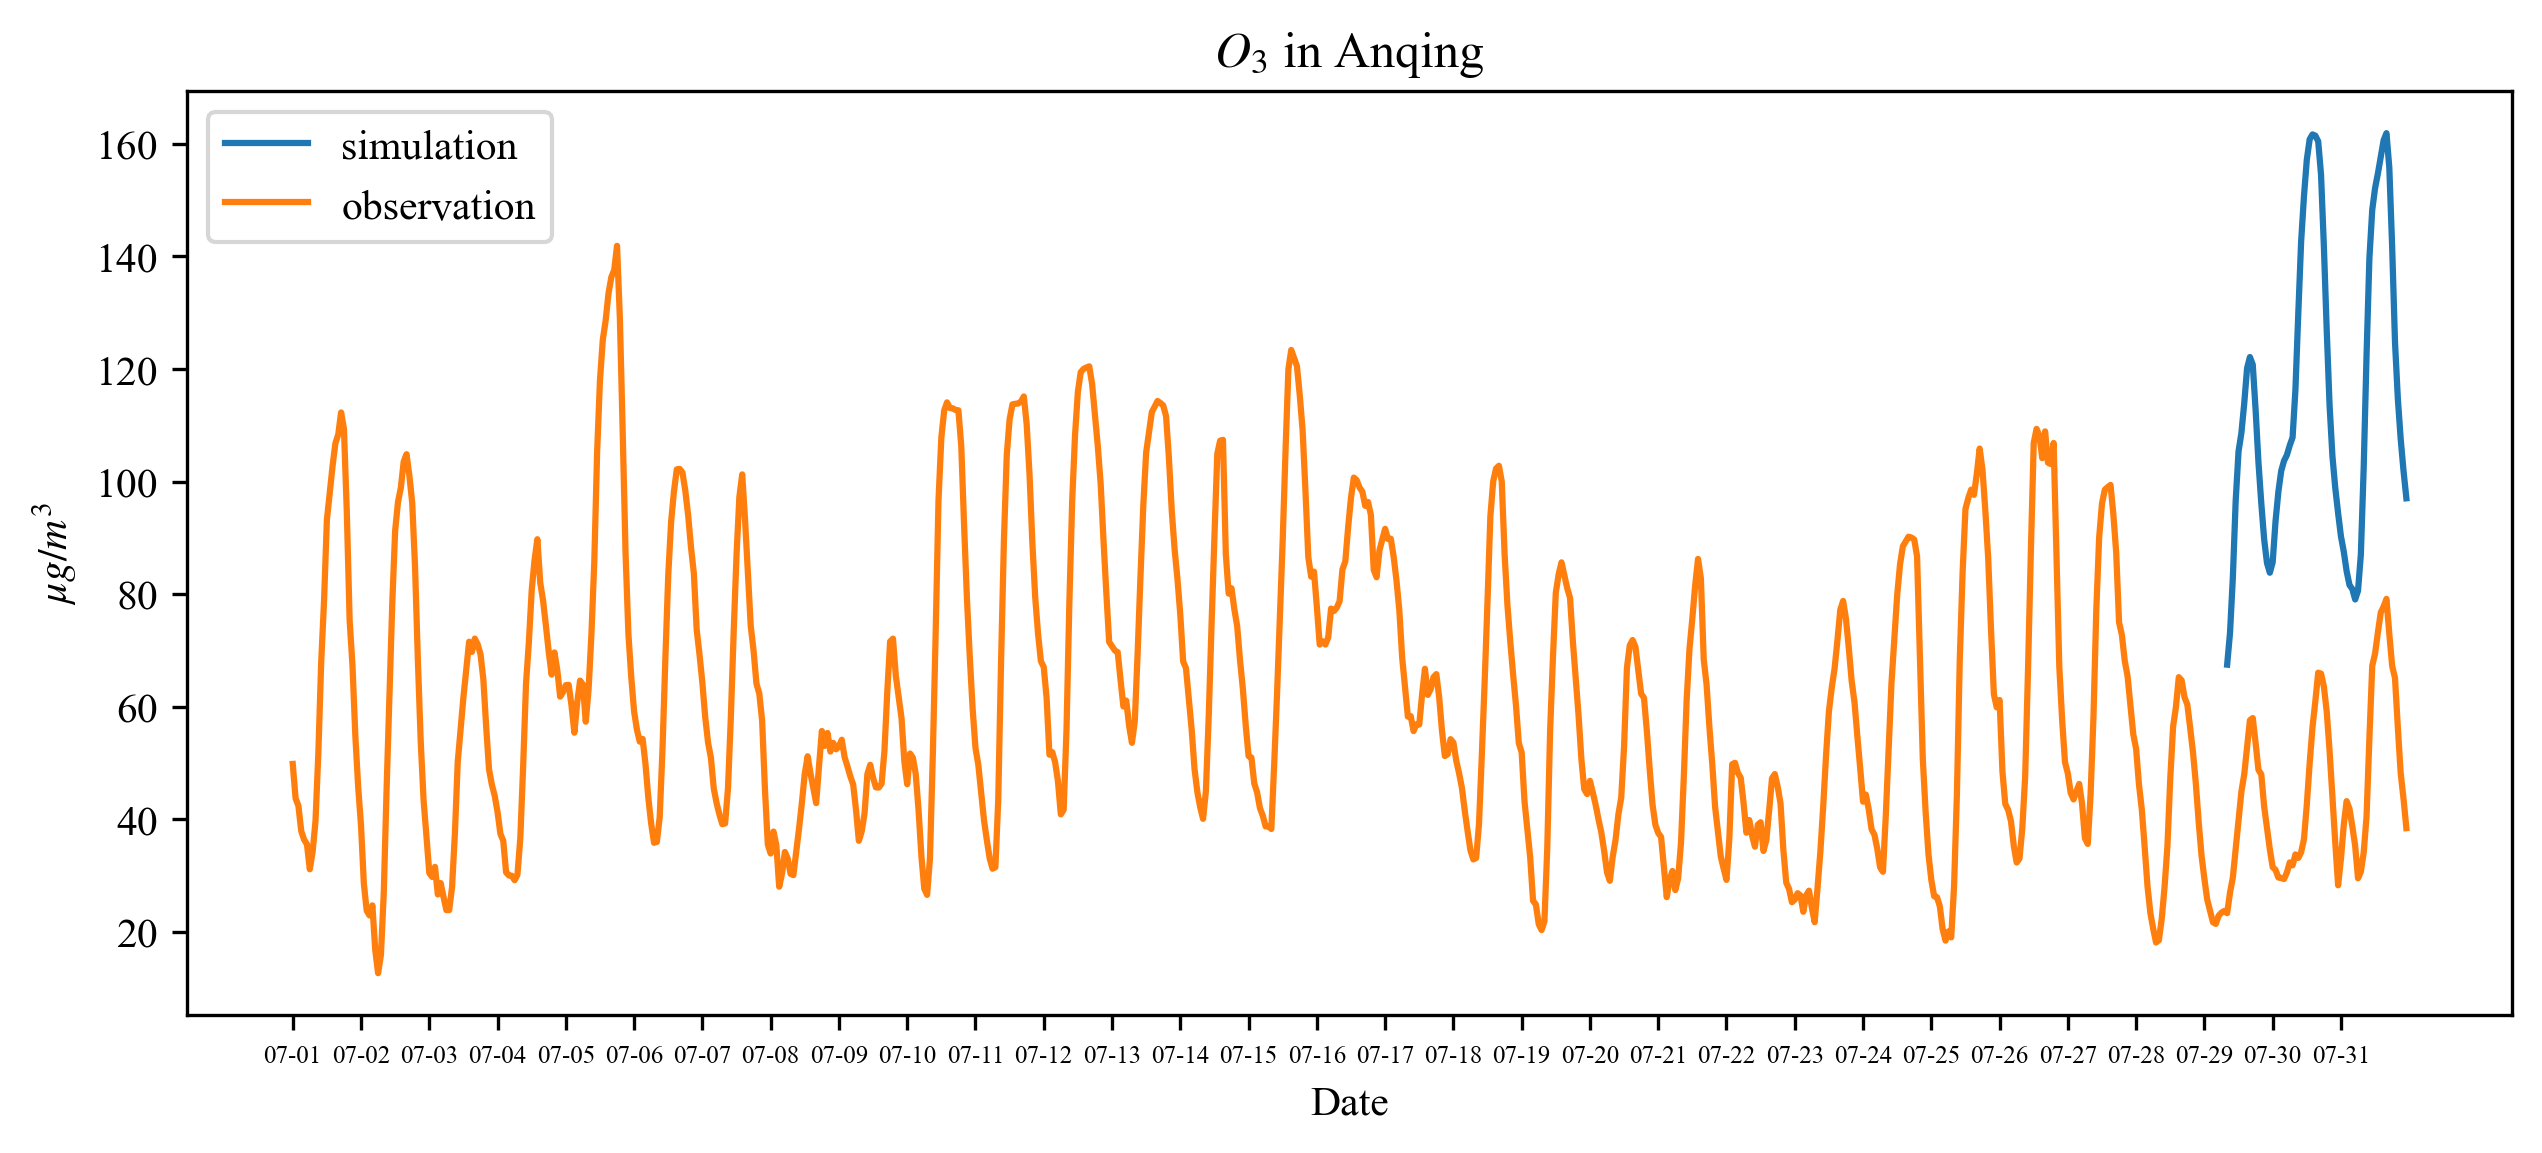

In [4]:
ax = me.linechart(sim, obs, timestart, timeend)

ax.legend(loc=2)
ax.set_title(f'{title} in Anqing')
ax.set_xlabel('Date')
ax.set_ylabel(units)
plt.show()

In [6]:
me.evaluation_frame(obs, sim, df)

,param,value
0,obs mean,90.322454
1,sim mean,143.024429
2,R,0.667822
3,MB,52.701975
4,RMSE,63.678788
5,IOA,0.632699


## 安庆市城区

In [7]:
df, sim, obs = me.get_var(cmaqfile,var,shpurban,obsurban,varch)


Get the O3 in shape of (720, 138, 135)
Extract the data within the boundary ...
Finish
Get the O3 in shape of (720,)
data is ready


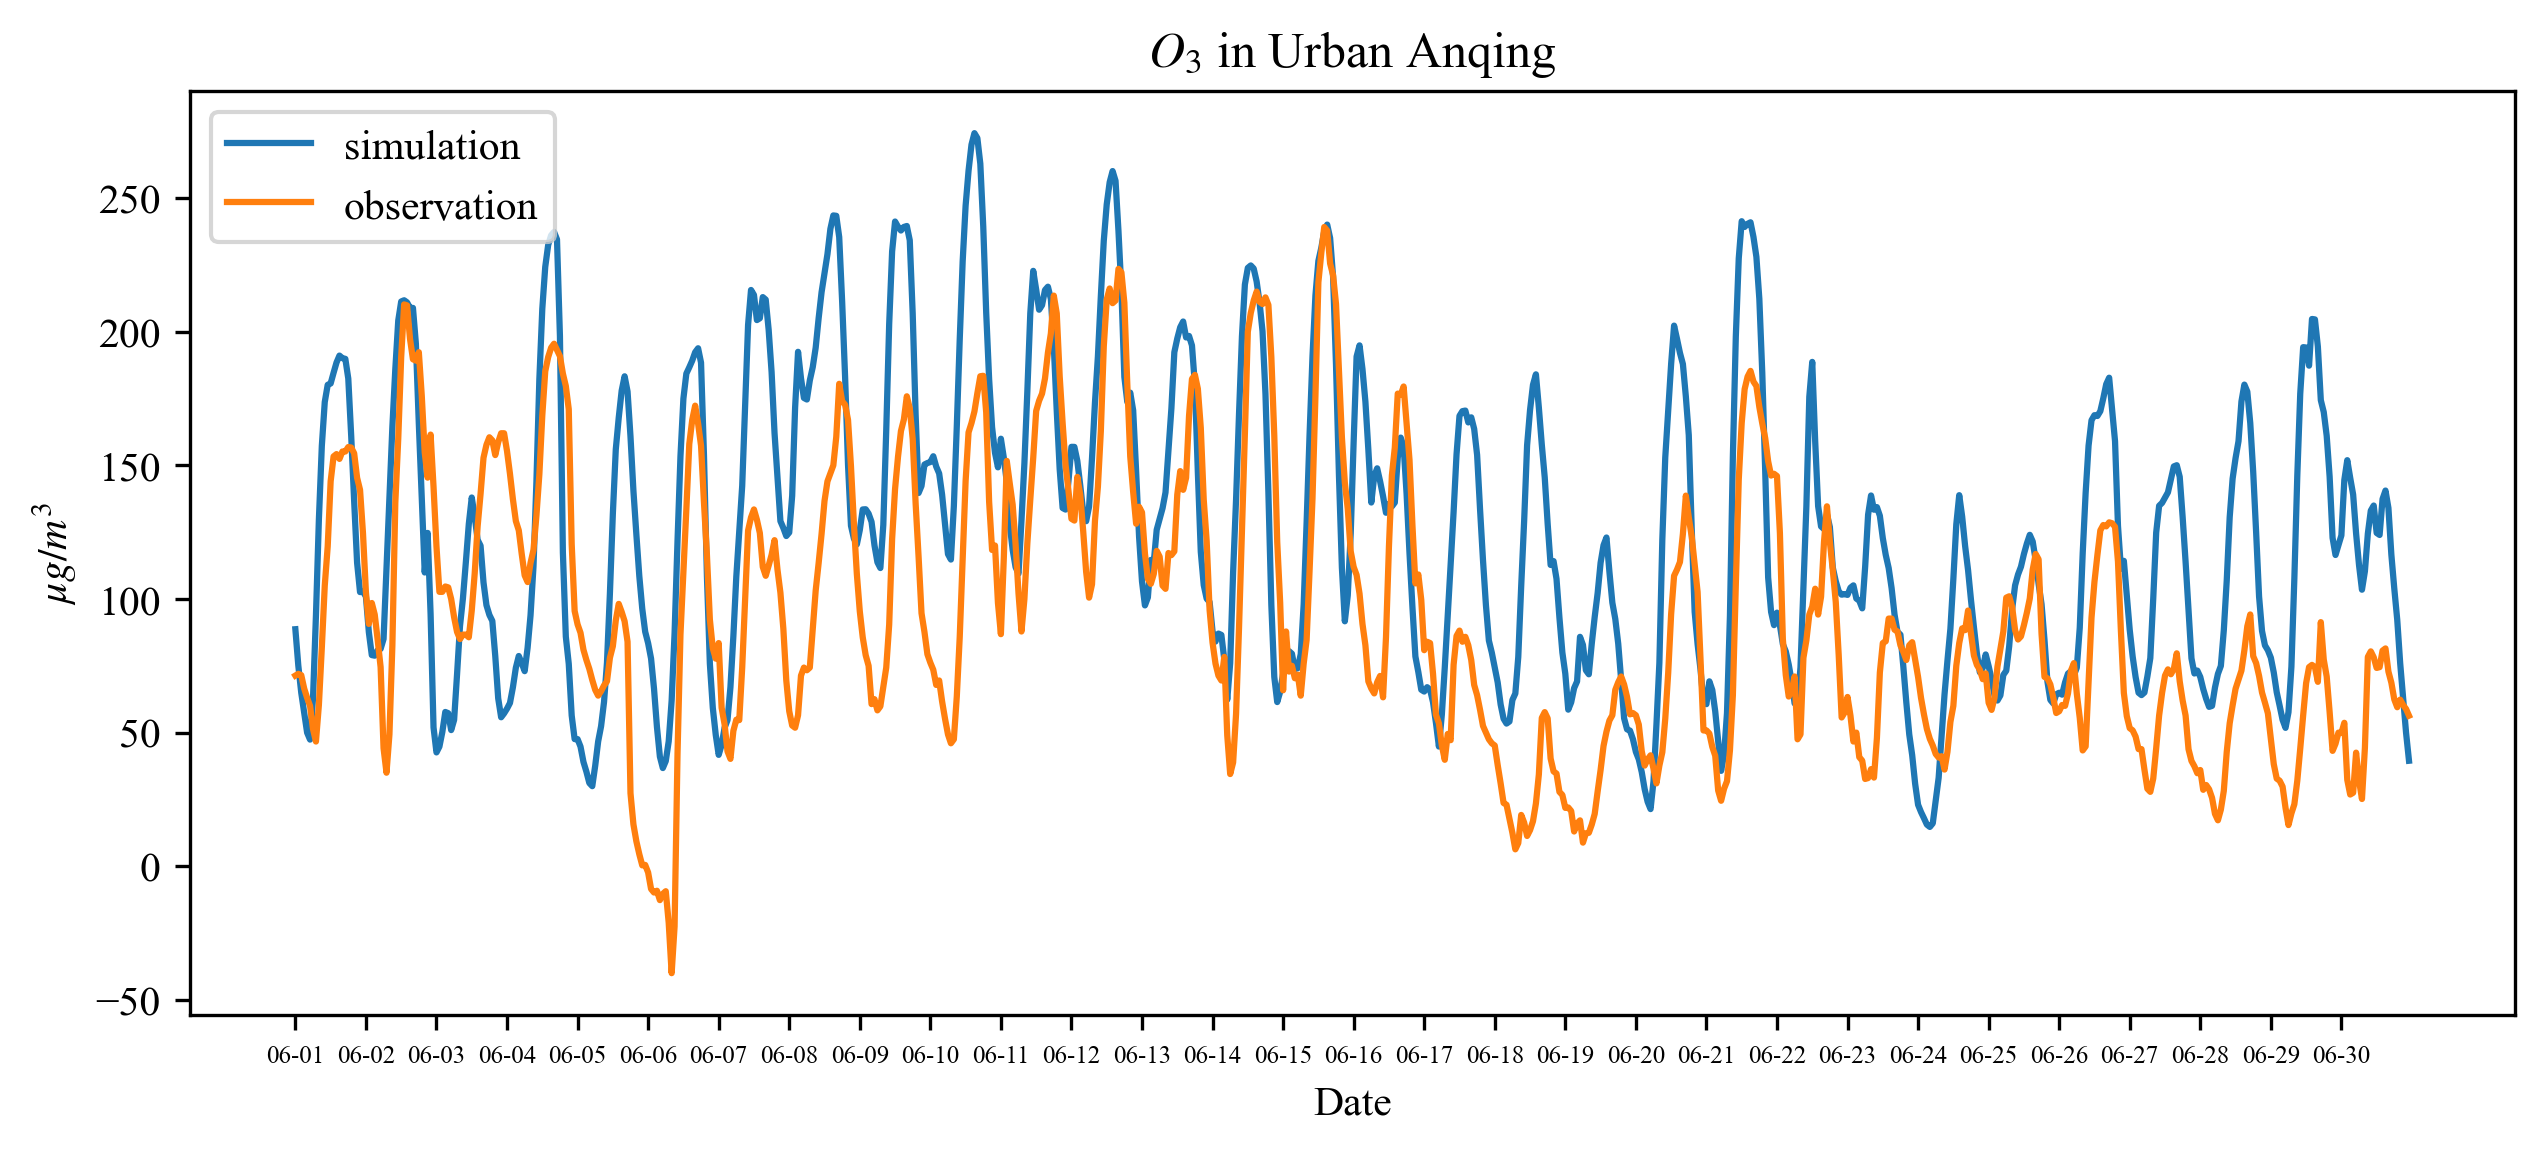

In [8]:
ax = me.linechart(sim, obs, timestart, timeend)

ax.legend(loc=2)
ax.set_title(f'{title} in Urban Anqing')
ax.set_xlabel('Date')
ax.set_ylabel(units)
plt.show()

In [9]:
me.evaluation_frame(obs, sim, df)

,param,value
0,obs mean,93.957361
1,sim mean,126.379402
2,R,0.633793
3,MB,32.422041
4,RMSE,57.115180
5,IOA,0.736579
